In [89]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pandas_datareader import data as web
import numpy as np
import statistics
import pandas as pd
import matplotlib.ticker
from datetime import datetime
import plotly.graph_objects as go

In [90]:
def calculate_percent(part, total):
    return (part / total)

In [91]:
def Date_format(stock, stocksheet):
    #my_dict = {}
    #my_dict[stock] = pd.read_csv(stocksheet)
    globals()[stock] = pd.read_csv(stocksheet)
    df = globals()[stock]  
    df.rename(columns={'Date': 'date'}, inplace=True)
    df.rename(columns={'Close': 'close'}, inplace=True)
    df.rename(columns={'Open': 'open'}, inplace=True)
    df.rename(columns={'Low': 'low'}, inplace=True)
    df.rename(columns={'High': 'high'}, inplace=True)
    stock_Years, stock_Months, stock_Days = [], [], []
    for date_string in df.date:
        date_object = datetime.strptime(date_string, "%Y-%m-%d")
        year, month, day = date_object.year, date_object.month, date_object.day
        month = month + calculate_percent(day, 30)
        year = year + calculate_percent(month, 12)
        year = year - 1 #since the dataset starts with month 12 which automatically advances the years with 1, so substract 1 for a simple solution
        stock_Years.append(year)
        stock_Months.append(month)
        stock_Days.append(day)  
    df['Years'], df["Month"], df["Day"] = stock_Years, stock_Months, stock_Days
    globals()[stock] = df 
    df.name = stock

In [92]:
def stock_plotter(name, col, width):
    plt.plot(name['Years'], name['close'], color = col, label=name.name, linewidth = width)

In [93]:
def black_theme():
    f = plt.figure()
    f.set_figwidth(11)
    f.set_figheight(7)
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.grid(axis='y', linestyle='-')

In [94]:
def plot_legend():
    ax = plt.gca()
    legend = ax.legend(loc='upper center')

In [95]:
Date_format('AAPL', 'AAPL.csv')
Date_format('SPY', 'SPY.csv')
Date_format('GOOGL', 'GOOGL.csv')
Date_format('AMZN', 'AMZN.csv')
Date_format('MSFT', 'MSFT.csv')
Date_format('NVDA', 'NVDA.csv')
Date_format('BTC', 'BTC.csv')
Date_format('TSLA', 'TSLA.csv')
Date_format('ETH', 'ETH.csv')
Date_format('BNB', 'BNB.csv')
Date_format('WMT', 'WMT.csv')
Date_format('AMD', 'AMD.csv')
Date_format('DIS', 'DIS.csv')
Date_format('TBIL', 'TBIL.csv')
Date_format('IWM', 'IWM.csv')
Date_format('NFLX', 'NFLX.csv')

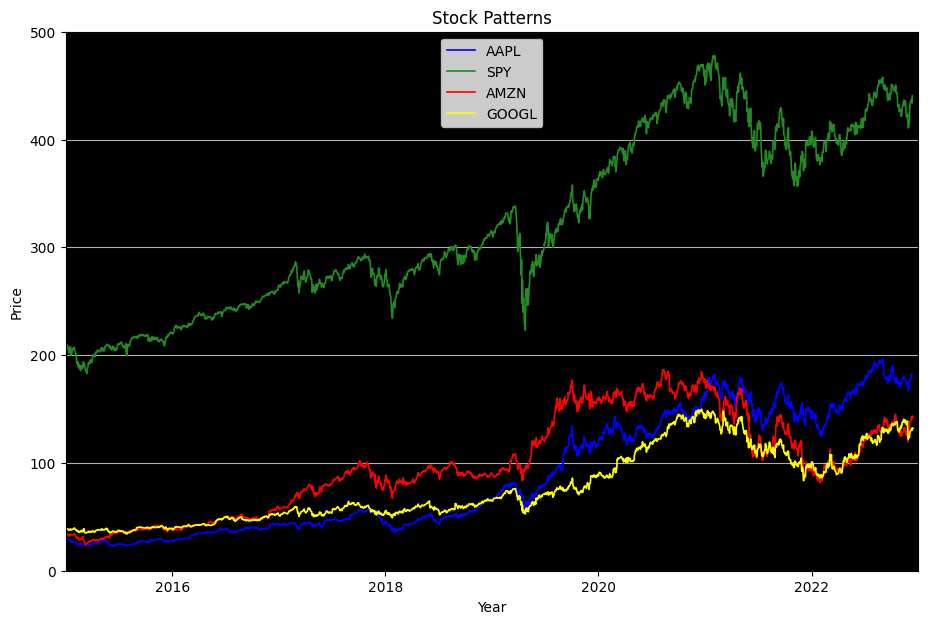

In [96]:
black_theme()
stock_plotter(AAPL , "blue", 1.2)
stock_plotter(SPY, "#228b22", 1.2)
stock_plotter(AMZN, "red", 1.2)
stock_plotter(GOOGL, "yellow", 1.2)
x_interval = 2  # Set this to your desired tick interval
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(x_interval))
plt.xlim([2015, 2023])
plt.ylim([0, 500])
plt.title('Stock Patterns')
plt.ylabel("Price")
plt.xlabel("Year")
legend = ax.legend(loc='upper center')

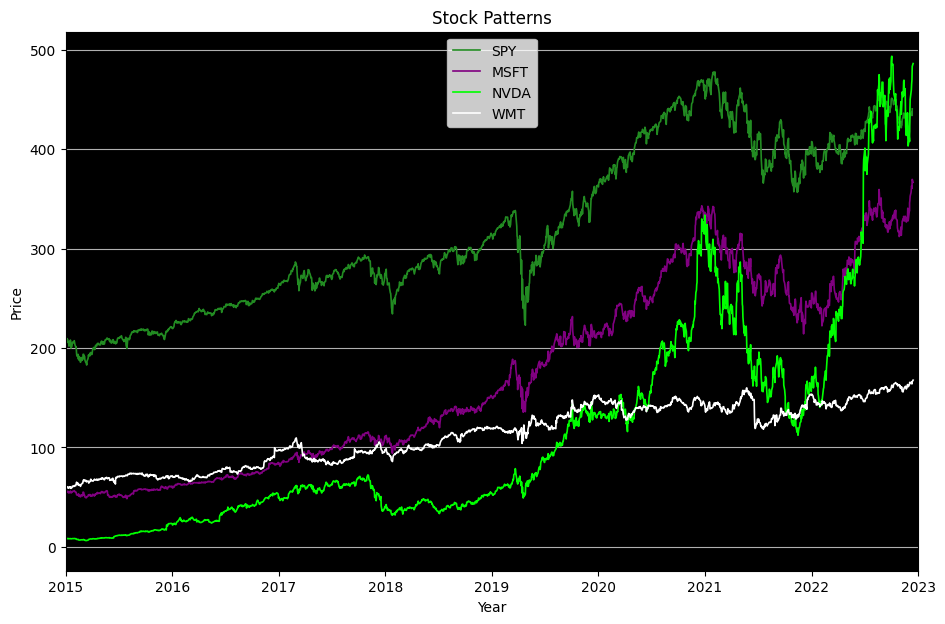

In [97]:
black_theme()
plt.xlim([2015, 2023])
stock_plotter(SPY, "#228b22", 1.2)
stock_plotter(MSFT, "purple", 1.2)
stock_plotter(NVDA, "lime", 1.2)
stock_plotter(WMT, "white", 1.2)
plt.title('Stock Patterns')
plt.ylabel("Price")
plt.xlabel("Year")
plot_legend()

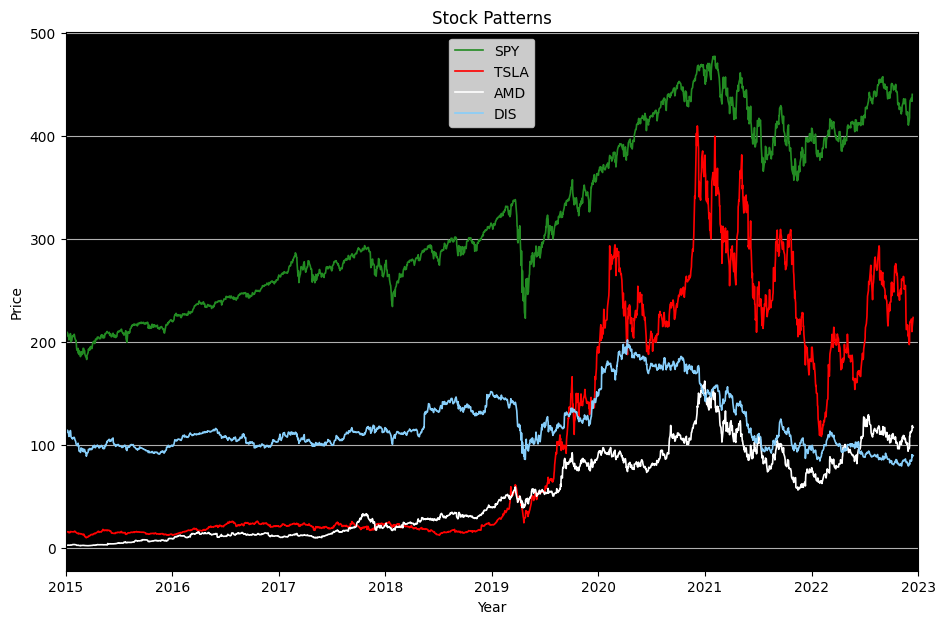

In [98]:
black_theme()
plt.xlim([2015, 2023])
stock_plotter(SPY, "#228b22", 1.2)
stock_plotter(TSLA, "red", 1.2)
stock_plotter(AMD, "white", 1.2)
stock_plotter(DIS, "#87cefa", 1.2)
plt.title('Stock Patterns')
plt.ylabel("Price")
plt.xlabel("Year")
plot_legend()

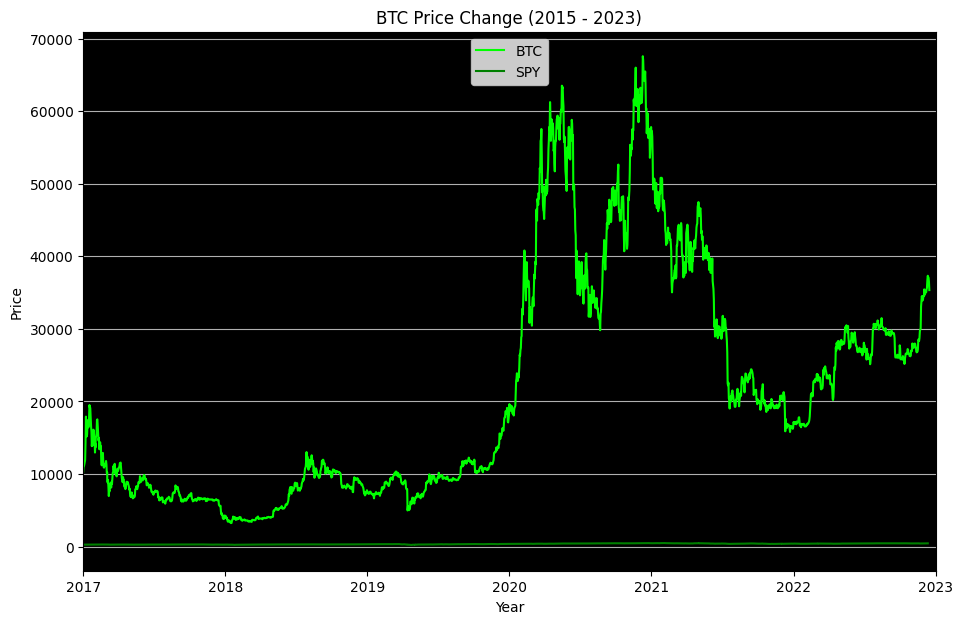

In [99]:
black_theme()
ax.set_facecolor("black")
plt.xlim([2017, 2023])
stock_plotter(BTC, "lime", 1.5)
stock_plotter(SPY, "Green", 1.5)
plt.title('BTC Price Change (2015 - 2023)')
plt.ylabel("Price")
plt.xlabel("Year")
plot_legend()

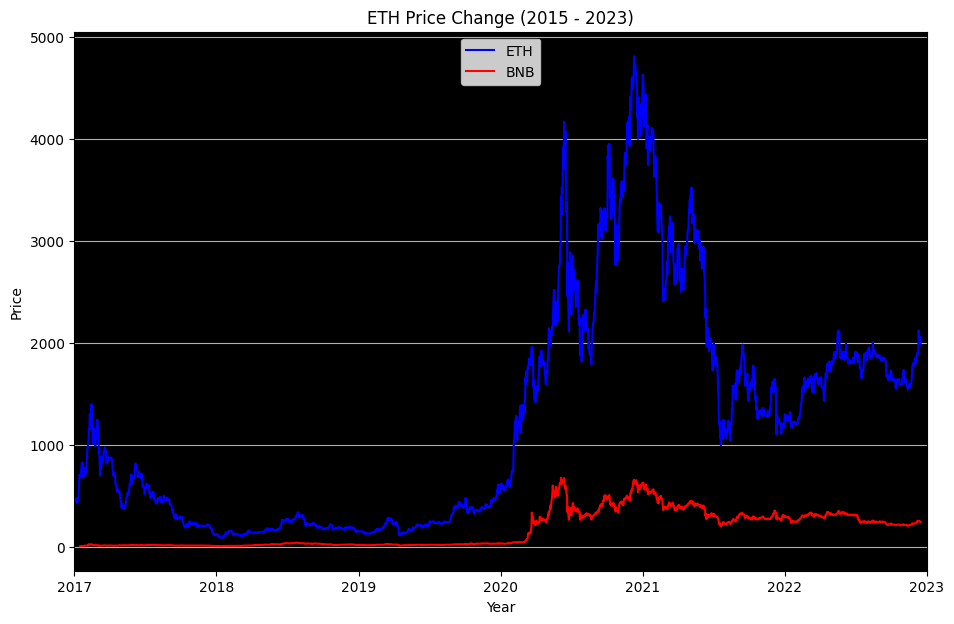

In [100]:
black_theme()
plt.xlim([2017, 2023])
stock_plotter(ETH, "blue", 1.5)
stock_plotter(BNB, "red", 1.5)
plt.title('ETH Price Change (2015 - 2023)')
plt.ylabel("Price")
plt.xlabel("Year")
plot_legend()

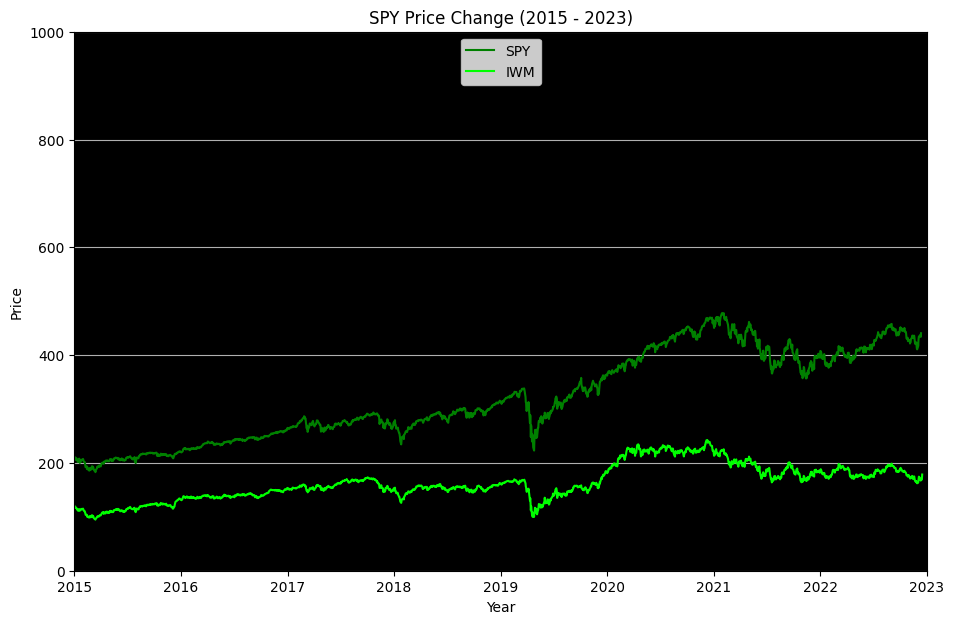

In [101]:
black_theme()
plt.xlim([2015, 2023])
plt.ylim([0, 1000])
plt.grid(axis='y', linestyle='-')
plt.title('SPY Price Change (2015 - 2023)')
plt.ylabel("Price")
plt.xlabel("Year")
stock_plotter(SPY, "Green", 1.5)
stock_plotter(IWM, "lime", 1.5)
plot_legend()

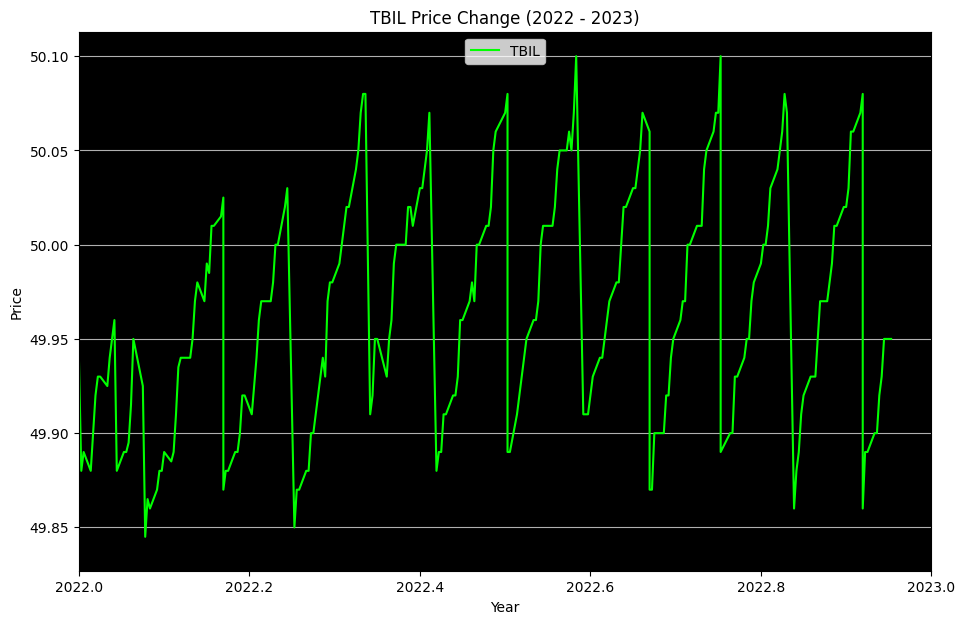

In [102]:
black_theme()
ax.set_facecolor("black")
plt.xlim([2022, 2023])
stock_plotter(TBIL, "lime", 1.5)
plt.title('TBIL Price Change (2022 - 2023)')
plt.ylabel("Price")
plt.xlabel("Year")
plot_legend()

[*********************100%%**********************]  1 of 1 completed


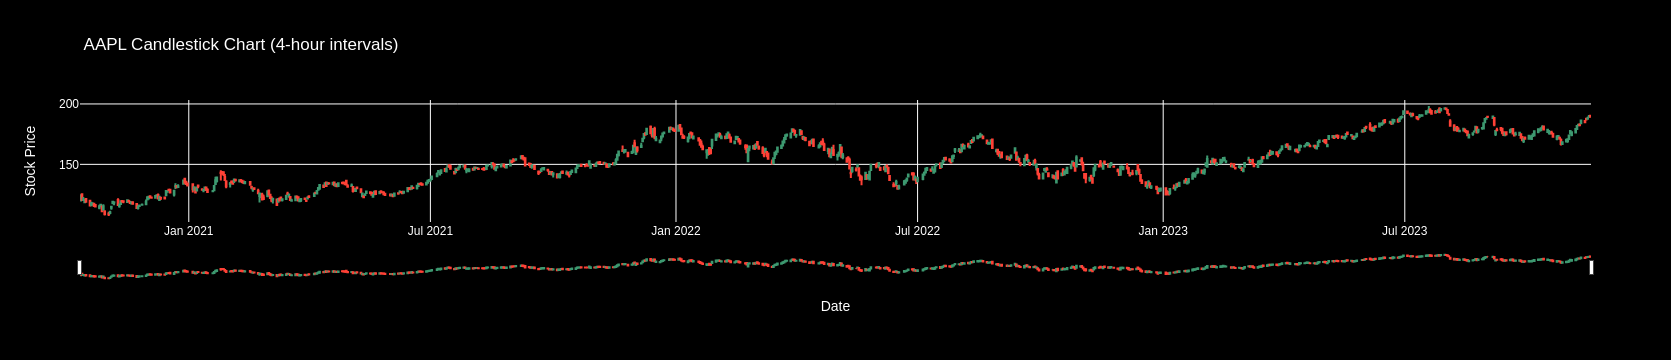

In [103]:
import yfinance as yf
import plotly.graph_objects as go

def get_stock_data(symbol, start_date, end_date, interval='1d'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return stock_data

# Example usage:
stock_symbol = "AAPL"  
start_date = "2020-10-10"
end_date = "2023-12-12"
interval = "1d" 

stock_data = get_stock_data(stock_symbol, start_date, end_date, interval)

fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
                                     open=stock_data['Open'],
                                     high=stock_data['High'],
                                     low=stock_data['Low'],
                                     close=stock_data['Close'],
                                     increasing_fillcolor='green',  
                                     decreasing_fillcolor='red',  
                                     line=dict(width=2))])

fig.update_layout(title=f"{stock_symbol} Candlestick Chart (4-hour intervals)",
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  plot_bgcolor='black',  
                  paper_bgcolor='black',  
                  font=dict(color='white'),
                  width = 1600)
fig.show()

## 